# **<font size=4 color=#BB3D00 face=微软雅黑>Hilbert 变换与瞬时频率</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/hilbert-transform-and-instantaneous-frequency.html     
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例：计算解析信号并得到瞬时频率</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：计算解析信号并得到瞬时频率</font>

Hilbert 变换仅可估计单分量信号的瞬时频率。单分量信号在时频平面中用单一“脊”来描述。单分量信号包括单一正弦波信号和 chirp 等信号。
生成以 1 kHz 采样的时长为两秒的 chirp 信号。指定 chirp 信号的最初频率为 100 Hz，一秒后增加到 200 Hz。

In [89]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [96]:
fs = 1000
t = np.linspace(0,2-1/fs,fs*2)
y = signal.chirp(t, f0=100,f1=200, t1=1, method='linear')

使用通过 stft函数实现的短时傅里叶变换来估计 chirp 信号的频谱图。下图中每个时间点有一个峰值频率，很好地描述了这一信号。

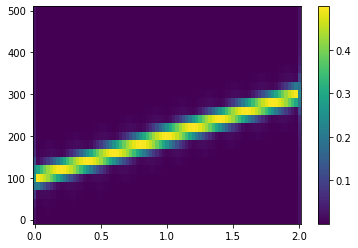

In [91]:
f,t1,zxx = signal.stft(y,fs,nperseg = 50)
plt.pcolormesh(t1, f, abs(zxx))
plt.colorbar()

计算解析信号并对相位进行微分以得到瞬时频率。对导数进行缩放以得到有意义的估计。

(0.0, 2.0)

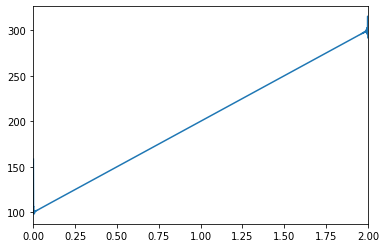

In [92]:
z = signal.hilbert(y)
instfrq = fs/(2*np.pi)*np.diff(np.unwrap(np.angle(z)))
plt.plot(t[1:],instfrq)
plt.xlim([0,2])


生成频率为 60 Hz 和 90 Hz 的两个正弦波的总和，以 1023 Hz 采样两秒。计算并绘制频谱图。在每个时间点都显示存在两个分量。

(0.0, 300.0)

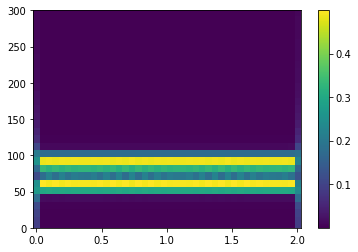

In [93]:
fs = 1023
t = np.linspace(0,2-1/fs,fs*2)
x = np.sin(2*np.pi*60*t)+np.sin(2*np.pi*90*t)

f,t2,zxx = signal.stft(x,fs,nperseg = 100)
plt.pcolormesh(t2, f, abs(zxx))
plt.colorbar()
plt.ylim([0,300])


计算分析信号并对其相位求微分。放大包含正弦波频率的区域。分析信号预测瞬时频率，即正弦波频率的平均值。

(60.0, 90.0)

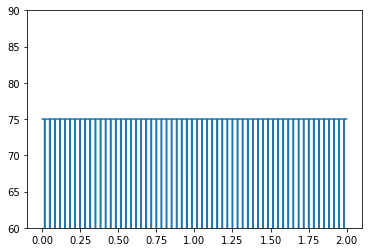

In [94]:
z = signal.hilbert(x)
instfrq = fs/(2*np.pi)*np.diff(np.unwrap(np.angle(z)))

plt.plot(t[1:],instfrq)
plt.ylim([60,90])


要采用时间的函数来估算这两个频率，请使用 spectrogram 求功率频谱密度，使用 tfridge 跟踪两个脊。在 tfridge 中，将更改频率的罚分指定为 0.1。

(0.0, 300.0)

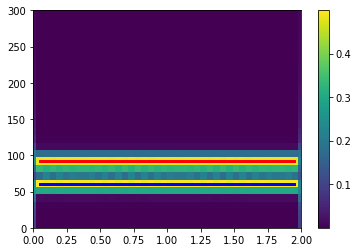

In [95]:
f,t2,zxx = signal.stft(x,fs,nperseg = 100)
plt.pcolormesh(t2, f, abs(zxx))
plt.colorbar()
plt.plot([0.05,1.95],[92,92],'r',linewidth = 3)
plt.plot([0.05,1.95],[60,60],'b',linewidth = 3)
plt.xlim([0,2])
plt.ylim([0,300])